<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 5 – Feature Importance, Dimensionality Reduction, KNN

Όνομα:Ναταλία Ταμβακίδου
ΑΕΜ:200

#Μέρος 1ο

#Εισαγωγή Βιβλιοθηκών

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import xgboost as xgb
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import product
from sklearn.model_selection import GridSearchCV
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,make_scorer
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image

#Ερώτημα 1

In [12]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [13]:
print("train set:",x_train.shape,y_train.shape)
print("test set:",x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


Σχόλιο: Συνεπώς έχουμε ένα σύνολο δεδομένων που είναι χωρισμένο traing set και test set.Για παράδειγμα στο train set έχουμε:

* Την μεταβλητή x_train που είναι ένας τρισδιάστατος με τιμές (60000,28,28).Δηλαδή περιέχει 60.000 δείγματα χειρόγραφων ψηφίων απο 0 εως 9 και κάθε δίγμα είναιθ μια ασπρόμαυρη εικόν σιαστάεων 28x28 pixels,όπου κάθε pixel αντιστοιχεί σε τιμή φωτεινότητας απο 0 εως 255.
* Την μεταβλητή y_train που είναι ενας μονοδιάστατος πίνακας 60.000 στοιχείων και περιέχουν το σωστό ψηφίο για κάθε εικόνα.



#Ερώτημα 2

In [14]:
x_all=np.concatenate((x_train,x_test),axis=0)
y_all=np.concatenate((y_train,y_test),axis=0)


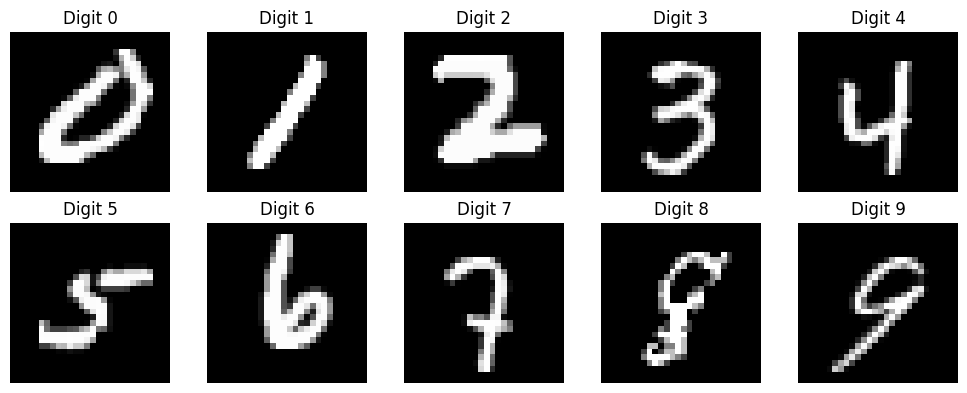

In [15]:
samples=[]
for i in range(10):
 indices=np.where(y_all==i)[0]
 random_index=np.random.choice(indices)
 samples.append(x_all[random_index])

plt.figure(figsize=(10,4))

for i,j in enumerate(samples):
  plt.subplot(2,5,i+1)
  plt.imshow(j,cmap='gray')
  plt.title(f"Digit {i}") # Corrected line: format the digit into the string
  plt.axis('off')

plt.tight_layout()
plt.show()

#Ερώτημα 3

In [16]:
print(x_all.shape)

(70000, 28, 28)


Μέγεθος και σημασία των pixels:
*   Κάθε εικόνα έχει 28x28 pixels(784 συνολικά),με τιμές απο 0-255.
*  Τα pixels που σχηματίζουν το ψηφίο είναι πιο σημαντικά για την αναγνώριση.
* Ενώ,τα pixels του φούντου αν και δεν είναι το σημαντικά καθορίζουν το που ξεκινάει και που τελειώνει το ψηφίο αλλά και το σχετικό του μέγεθος μέσα στην εικόνα,συμβάλοντας στην βελτίωση της γενίκευσης του μοντέλου.






#Ερώτημα 4

In [17]:
x_train_vector=x_train.reshape(x_train.shape[0],784)
x_test_vector=x_test.reshape(x_test.shape[0],784)

In [18]:
print(x_train_vector.shape)
print(x_test_vector.shape)

(60000, 784)
(10000, 784)


#Ερώτημα 5

In [19]:
#Χρήση του ταξινομιτή k-NN χωρίς να έχουν κανονικοποιηθεί τα δεδομένα

N=x_train_vector.shape[0]
k_values=[5,15,51,int(np.sqrt(N))]
print(k_values)


[5, 15, 51, 244]


In [20]:
train_acc=[]
test_acc=[]
for i in k_values:
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train_vector,y_train)
  y_train_pred=model.predict(x_train_vector)
  y_test_pred=model.predict(x_test_vector)

  acc_train=accuracy_score(y_train,y_train_pred)
  acc_test=accuracy_score(y_test,y_test_pred)
  train_acc.append(acc_train)
  test_acc.append(acc_test)

print("Train accuracy:",train_acc)
print("Test accuracy:",test_acc)

Train accuracy: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracy: [0.9688, 0.9633, 0.9533, 0.9241]


Σχόλιο: Παρατηρούμε ότι όσο  ανεβαίνει η τιμή του κ η απόδοση τόσο στο traing set όσο και στο test set πέφτει.Αυτό συμβαίνει γιατί το μοντέλο χρησιμοποιεί ένα απλό σύνορο προκειμένου να οριοθετήσει της κλάσεις και έτσι ταξινομεί λανθασμένα τα δεδομένα.

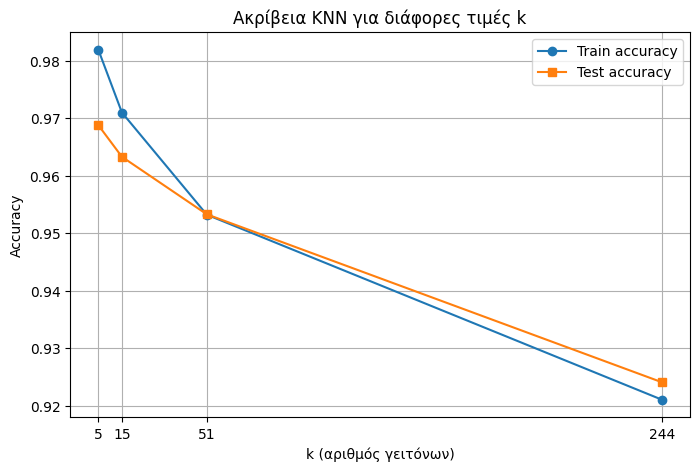

In [21]:
plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label='Train accuracy')
plt.plot(k_values, test_acc, marker='s', label='Test accuracy')
plt.xlabel("k (αριθμός γειτόνων)")
plt.ylabel("Accuracy")
plt.title("Ακρίβεια KNN για διάφορες τιμές k")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

#Ερώτημα 6

In [22]:
#κανονικοποιήση με την μέθοδο ελαχίστου-μεγιστου στο δίαστημα [0,1]
x_train_vector=x_train_vector/255
x_test_vector=x_test_vector/255


In [23]:
train_nor_acc=[]
test_nor_acc=[]
for i in k_values:
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train_vector,y_train)
  y_train_pred=model.predict(x_train_vector)
  y_test_pred=model.predict(x_test_vector)

  acc_train=accuracy_score(y_train,y_train_pred)
  acc_test=accuracy_score(y_test,y_test_pred)
  train_nor_acc.append(acc_train)
  test_nor_acc.append(acc_test)

print("Train accuracy:",train_nor_acc)
print("Test accuracy:",test_nor_acc)

Train accuracy: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracy: [0.9688, 0.9633, 0.9533, 0.9241]


Σχόλιο:Παρατηρούμε ότι ενώ κανονικοποιήσαμε τα δεδομένα μας στο δίαστημα [0,1] η απόδοση του μοντέλου μας δεν άλλαξε.Αυτό συμβαίνει γιατί κάθε χαραχτηριστικό είναι η τιμή που παίρνει ενα συγκεκριμένο pixel απο 0 εως 255.Άρα όλα τα χαρακτηριστικά μπορούν να πάρουν τιμές μόνο από το ίδιο διάστημα [0,255] και έτσι δεν επηρεάζει κάποιο χαρακτηριστικό την απόσταση επειδή έχει πάρει μεγάλη αριθμητική τιμη.Στην περίπτωση που τα χαρακτηριστίκα μας είχαν το καθένα(ή κάποια απο αυτά) διαφορετική μονά μέτρησης αν δεν γινόταν κανονικοποήση των δεδομένων πριν την εκπαίδευση τα χαρακτηριστικά που θα μπορούσαν να πάρουν τις μεγαλύτρες αριθμητικές τιμές θα καθόριζαν και τις αποστάσεις.

#Ερώτημα 7

In [24]:
img=Image.open("Εργασία 5.png")

In [25]:
img=Image.open("Εργασία 5.png").convert("L")
img=img.resize((28,28))
img_array=np.array(img)/255.0

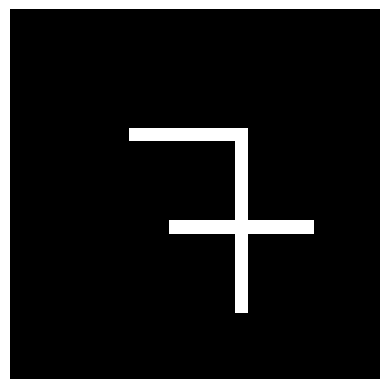

In [26]:
# η εικόνα που δώσαμε
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()

In [27]:
img_vector=img_array.reshape(1,28*28)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_vector,y_train)
y_pred=model.predict(img_vector)
print("Predicted digit:",y_pred[0])

Predicted digit: 7
